/Users/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
/Users/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide


actual value using scipy integration is:  0.8389329600133838
approximation using Monte Carlo naive method is:  0.6076
approximation using Monte Carlo mean value method is:  0.8414486919281091
approximation using Monte Carlo importance sampling method version 1 is:  0.8476284535824569
approximation using Monte Carlo importance sampling method version 2 is:  0.8353860131302824

actual value using scipy integration is:  20.594976039904015
approximation using Monte Carlo naive method is:  0.7089
approximation using Monte Carlo mean value method is:  4.525213725617455
approximation using Monte Carlo importance sampling method version 1 is:  17.918811711769173
approximation using Monte Carlo importance sampling method version 2 is:  17.483311758018353


/Users/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in true_divide
/Users/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in true_divide


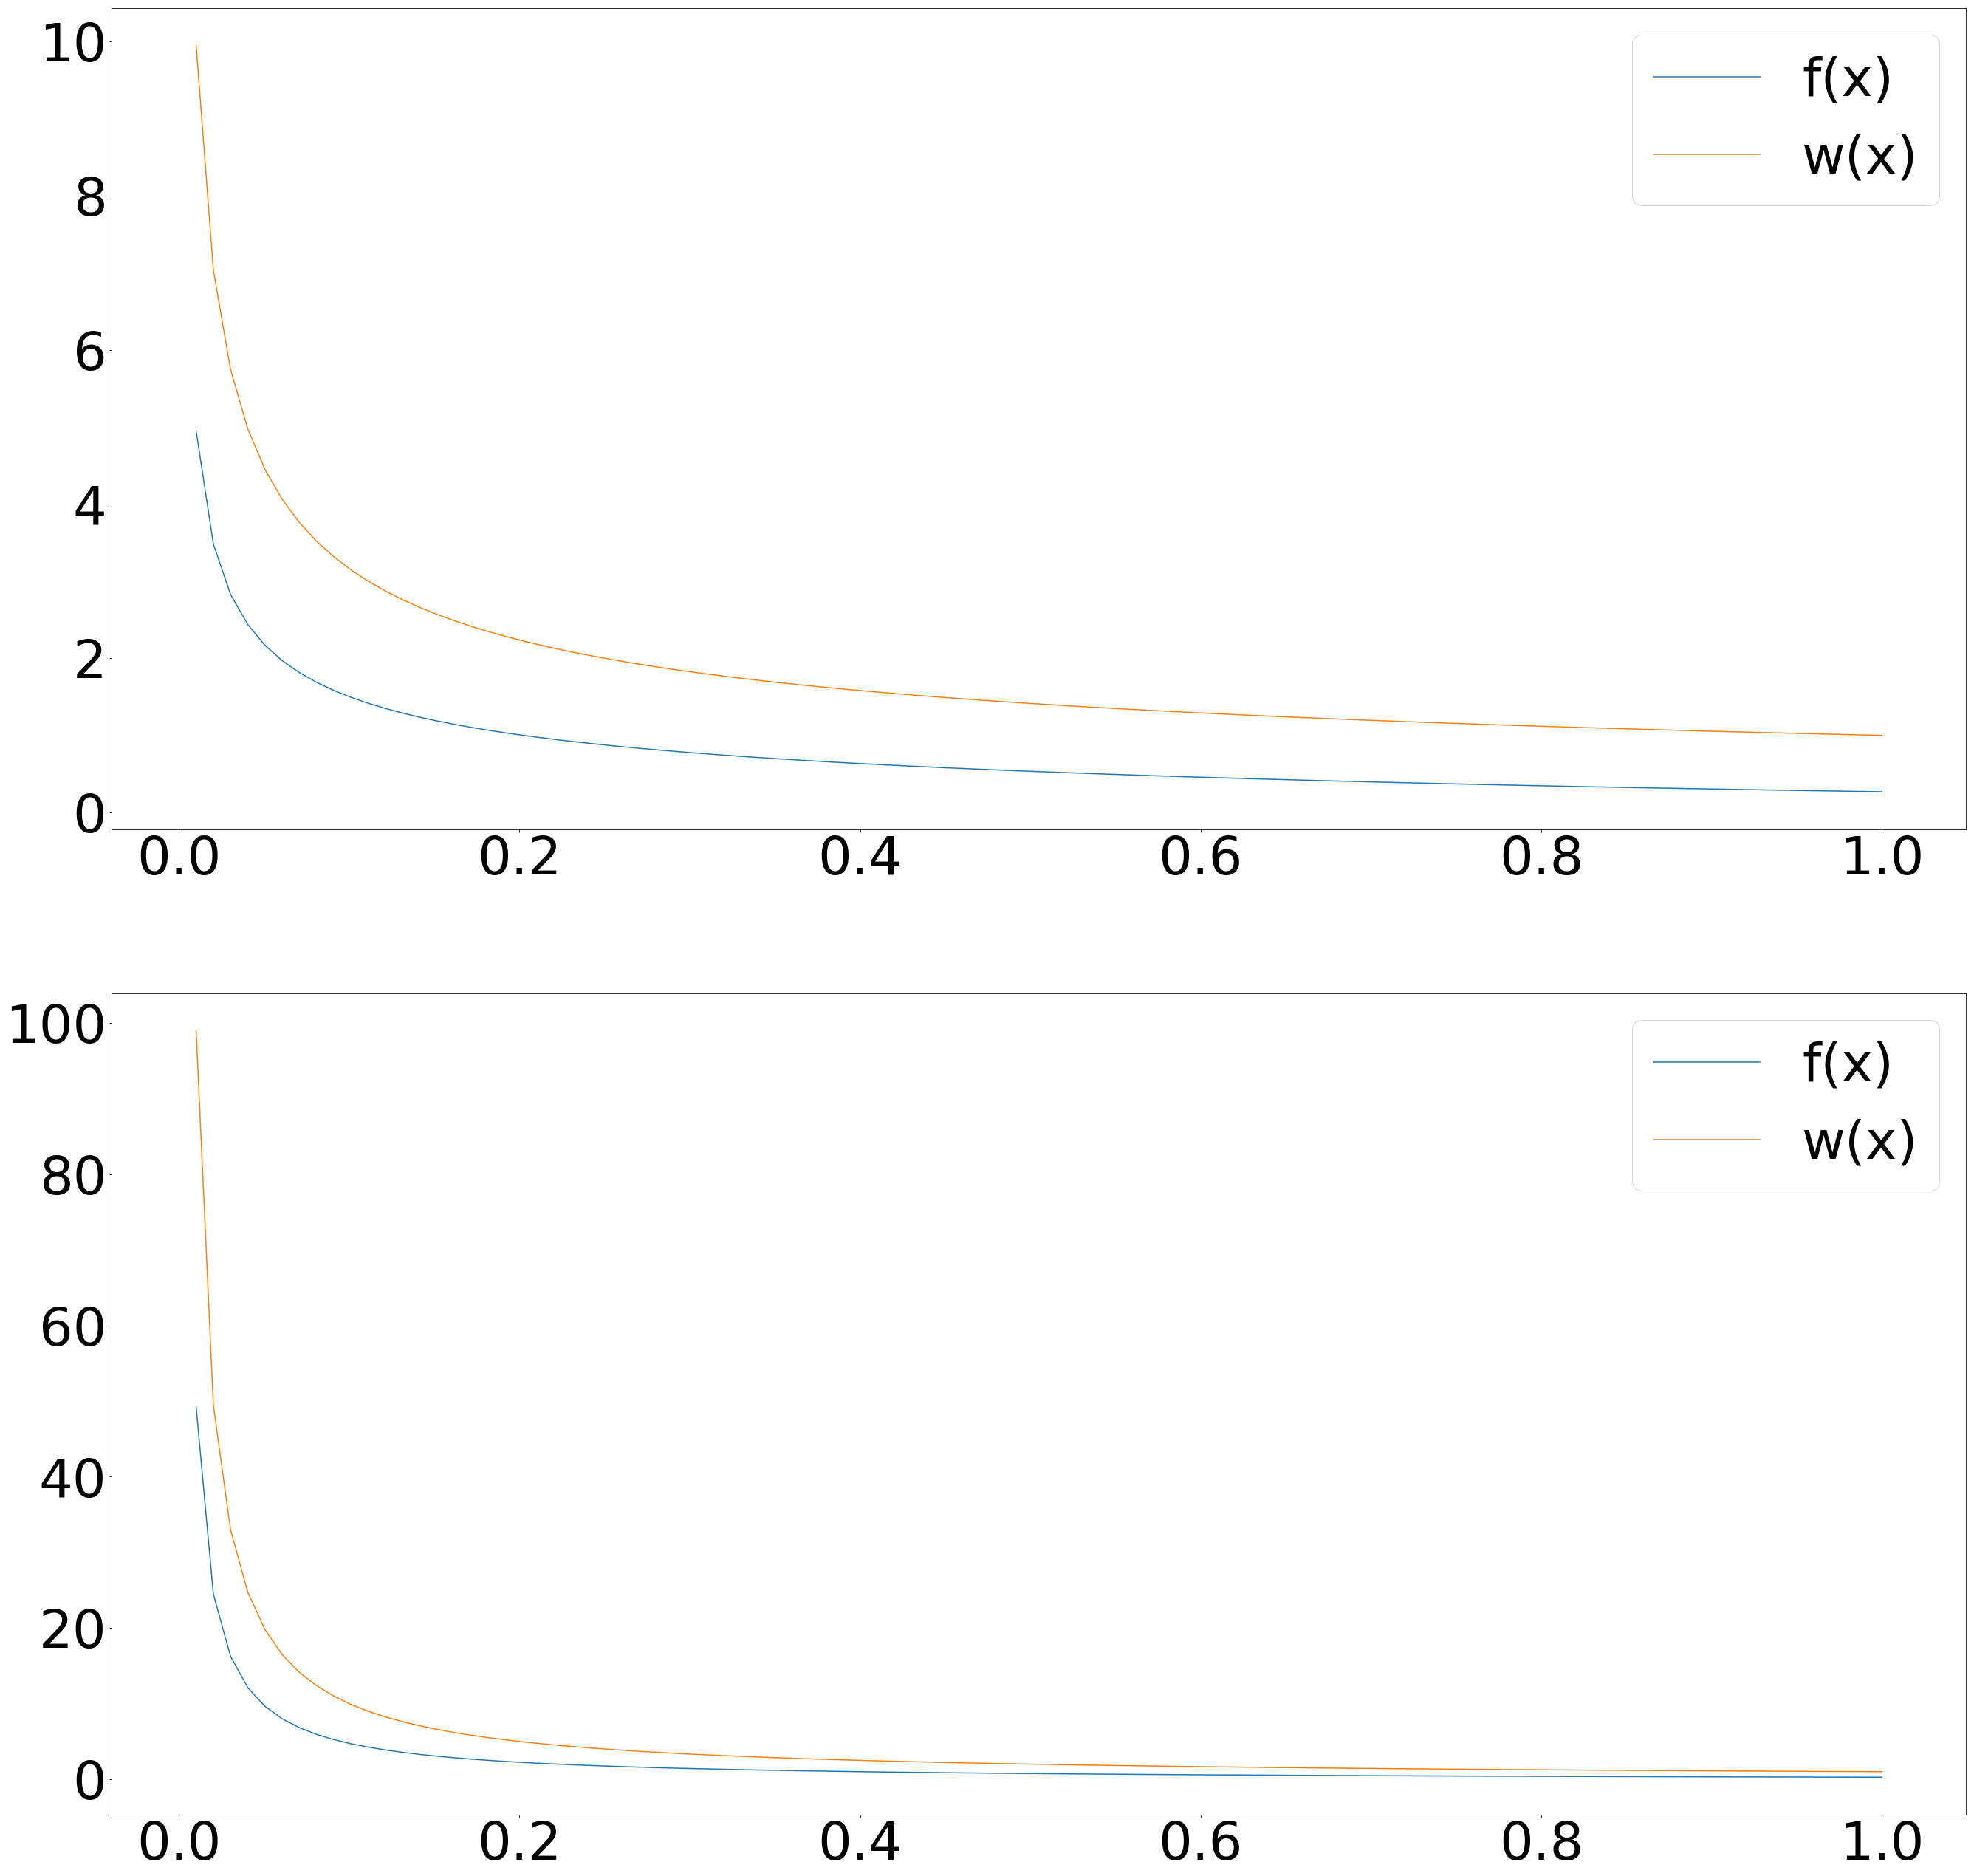

In [11]:
# Monte Carlo Importance Sampling redo
# https://github.com/qzhu2017/2017-cmp/blob/master/Lec_12_monte_carlo2.ipynb
# original homework submission: https://github.com/tpc/2017-cmp/blob/master/PHYS300_assignment_7.ipynb

from scipy import integrate
import numpy as np
from random import random, uniform
import matplotlib.pyplot as plt

def MC1(N):
    count = 0
    for i in range(N):
        x = 1 * random()
        y = random()
        if y < h(x):
            count += 1
    I = count / N
    return I


def MC2(N):
    I = 0
    for i in range(N):
        x = 1 * random()
        I += h(x)
    return I / N

def MC3_a(N):
    sum = 0.0
    for i in range(N):
        x = uniform(0, 1)
        f = x**(-1/2) / (np.exp(x) + 1)
        #pdf = 2*np.sqrt(x)
        pdf = 1
        sum += f / pdf
    I = (1 / N) * sum
    return I

#def f(x):
#    return sin(1/x/(2-x))**2

h = lambda x: x**(-1/2) / (np.exp(x) + 1)
a, b = 0, 1
#f = 1 / (b - a)
#w = h * (b - a)


f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
p = lambda x: 1/2*np.sqrt(x)

x = np.linspace(0,1,100)
plt.figure(figsize=(45,45))
plt.subplot(211)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')
plt.legend(fontsize=72)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)


def IMC(N):
    const = integrate.quad(w, 0, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = p(x)
        I += f(y)/w(y)
    return I/N*const

a_tuple = integrate.quad(h, a, b)
print("actual value using scipy integration is: ", a_tuple[0])
print("approximation using Monte Carlo naive method is: ", MC1(10000))
print("approximation using Monte Carlo mean value method is: ", MC2(10000))
print("approximation using Monte Carlo importance sampling method version 1 is: ", MC3_a(10000))
print("approximation using Monte Carlo importance sampling method version 2 is: ", IMC(1000000))
print()

h = lambda x: x**(-1) / (np.exp(x) + 1)
a, b = 0, 1
#f = 1 / (b - a)
#w = h * (b - a)

f = lambda x: 1/x/(np.exp(x)+1)
w = lambda x: 1/x
p = lambda x: x*x

def MC3_b(N):
    sum = 0.0
    for i in range(N):
        x = uniform(0, 1)
        f = x**(-1) / (np.exp(x) + 1)
        pdf = 1
        sum += f / pdf
    I = (1 / N) * sum
    return I


def IMC(N):
    const = integrate.quad(w, 0, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = p(x)
        I += f(y)/w(y)
    return I/N*const

a_tuple = integrate.quad(h, a, b)
print("actual value using scipy integration is: ", a_tuple[0])
print("approximation using Monte Carlo naive method is: ", MC1(10000))
print("approximation using Monte Carlo mean value method is: ", MC2(10000))
print("approximation using Monte Carlo importance sampling method version 1 is: ", MC3_b(10000))
print("approximation using Monte Carlo importance sampling method version 2 is: ", IMC(1000000))


x = np.linspace(0,1,100)
plt.subplot(212)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')
plt.legend(fontsize=72)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.show()

In [7]:
import matplotlib.pyplot as plt

# 1% chance of decay
p = 0.01

# time scale for decay is 1/p, which means 100 seconds, but we want a time step much less than 100 seconds
# we prefer 1 second, so
delta_t = 1

# starting number of atoms
n = 100000

# starting time
t = 0.0

while t < 500:
    n = n - (n * p * delta_t)
    t = t + delta_t
    print("number of atoms: ", n)
    print("time is: ", t)

number of atoms:  99000.0
time is:  1.0
number of atoms:  98010.0
time is:  2.0
number of atoms:  97029.9
time is:  3.0
number of atoms:  96059.601
time is:  4.0
number of atoms:  95099.00499
time is:  5.0
number of atoms:  94148.0149401
time is:  6.0
number of atoms:  93206.53479069899
time is:  7.0
number of atoms:  92274.469442792
time is:  8.0
number of atoms:  91351.72474836408
time is:  9.0
number of atoms:  90438.20750088044
time is:  10.0
number of atoms:  89533.82542587163
time is:  11.0
number of atoms:  88638.48717161291
time is:  12.0
number of atoms:  87752.10229989678
time is:  13.0
number of atoms:  86874.58127689782
time is:  14.0
number of atoms:  86005.83546412885
time is:  15.0
number of atoms:  85145.77710948756
time is:  16.0
number of atoms:  84294.31933839268
time is:  17.0
number of atoms:  83451.37614500876
time is:  18.0
number of atoms:  82616.86238355868
time is:  19.0
number of atoms:  81790.69375972309
time is:  20.0
number of atoms:  80972.78682212585
tim

number of atoms:  1925.8899942320843
time is:  393.0
number of atoms:  1906.6310942897635
time is:  394.0
number of atoms:  1887.5647833468659
time is:  395.0
number of atoms:  1868.689135513397
time is:  396.0
number of atoms:  1850.0022441582632
time is:  397.0
number of atoms:  1831.5022217166807
time is:  398.0
number of atoms:  1813.1871994995138
time is:  399.0
number of atoms:  1795.0553275045186
time is:  400.0
number of atoms:  1777.1047742294734
time is:  401.0
number of atoms:  1759.3337264871786
time is:  402.0
number of atoms:  1741.740389222307
time is:  403.0
number of atoms:  1724.3229853300838
time is:  404.0
number of atoms:  1707.079755476783
time is:  405.0
number of atoms:  1690.0089579220153
time is:  406.0
number of atoms:  1673.1088683427952
time is:  407.0
number of atoms:  1656.3777796593672
time is:  408.0
number of atoms:  1639.8140018627735
time is:  409.0
number of atoms:  1623.4158618441456
time is:  410.0
number of atoms:  1607.1817032257043
time is:  41

In [6]:
num_of_decks_in_shoe = 6
tuple_of_number_of_cards_dealt_before_reshuffling = ()

def find_deck_penetration(num_of_decks_in_shoe, list_of_number_of_cards_dealt_before_reshuffling):
  num_of_cards_in_shoe = num_of_decks_in_shoe * 52
  deck_penetration_percentage = sum(tuple_of_number_of_cards_dealt_before_reshuffling) / num_of_cards_in_shoe
  return deck_penetration_percentage

tuple_of_number_of_cards_dealt_before_reshuffling = (11, 13, 15, 15, 7, 5, 10, 8, 12, 12, 8, 6, 11, 10, 8, 11, 12, 8, 7, 9, 7, 9, 11)

find_deck_penetration(num_of_decks_in_shoe, tuple_of_number_of_cards_dealt_before_reshuffling)

num_of_decks_in_shoe = 8
find_deck_penetration(num_of_decks_in_shoe, tuple_of_number_of_cards_dealt_before_reshuffling)

0.5408653846153846